In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FDTD_1D

In [2]:
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2 * sigma ** 2))

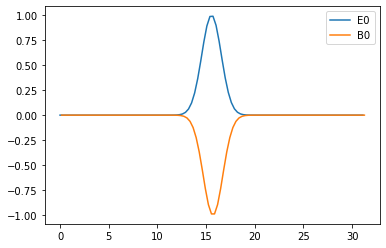

In [3]:
dt = 0.03
k = 1
omega = 1
L = 10 * np.pi
nx = 100
dx = L / nx
x = np.arange(nx) * dx
x1 = x + dx / 2
dt = 0.95*dx
# E_0 = np.sin(k*x + omega * dt / 2) # t = -dt / 2
# B_0 = np.sin(k*x)
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
# B_0 = np.zeros_like(x1)
# E_0 = np.sin((x - dt / 2))
# B_0 = - np.sin(x1)

plt.plot(x, E_0, label='E0')
plt.plot(x1, B_0, label='B0')
plt.legend()
plt.show()

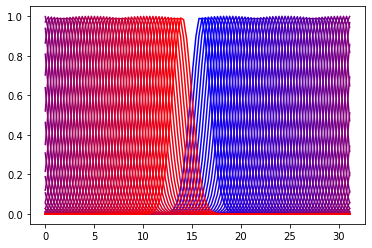

In [4]:
step = 100
E_history = []
B_history = []
for i in range(step):
    E_0, B_0 = FDTD_1D.field_evolve_vacuum(E_0, B_0, dx, dt)
    E_history.append(E_0)
    B_history.append(B_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))
plt.show()

In [28]:
Omega_p = np.zeros_like(x)
start = int(nx * 0.75)
stop = int(nx * 0.9)
omega_p = 0.1
medium_range = slice(int(nx * 0.75), int(nx * 0.9))
Omega_p[start:stop] += omega_p
Omega_p[start] = omega_p / 2
Omega_p[stop] = omega_p / 2
nu = np.zeros_like(x)

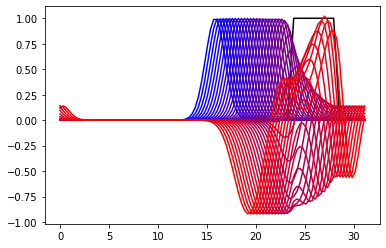

In [32]:
step = 50
E_history = []
B_history = []
E_0 = gaussian(x, 1, 5*np.pi - dt / 2, 1)
B_0 = - gaussian(x1, 1, 5*np.pi, 1)
J_0 = np.zeros_like(x)
plt.plot(x, Omega_p / omega_p, c='black')
for i in range(step):
    E_0, B_0, J = FDTD_1D.field_evolve_medium(E_0, B_0, J_0, Omega_p, nu, dx, dt)
    E_history.append(E_0)
    B_history.append(B_0)
    plt.plot(x, E_0, c=(i/step,0,1-i/step))
plt.show()